In [1]:
import pandas as pd

dataset = pd.read_csv('original_dataset.csv')

dataset.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0


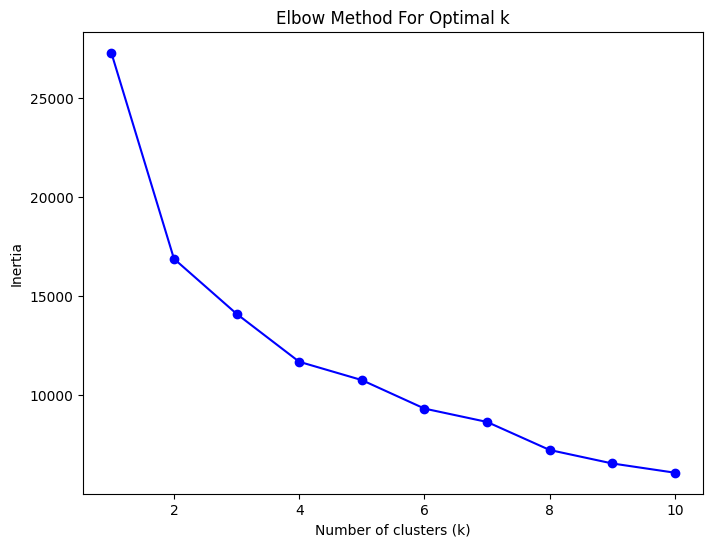

         country         Year  Region  \
Cluster                                 
0            NaN  2003.907080     NaN   
1            NaN  2007.553191     NaN   
2            NaN  2007.692098     NaN   
3            NaN  2002.391304     NaN   

         CO2 emissions from fuel combustion (MtCO2)  \
Cluster                                               
0                                        320.203376   
1                                       6284.394374   
2                                        187.182517   
3                                       2112.725490   

         Average CO2 emission factor (tCO2/toe)  \
Cluster                                           
0                                      2.456033   
1                                      2.649868   
2                                      1.615514   
3                                      2.514795   

         CO2 intensity at constant purchasing power parities (kCO2/$15p)  \
Cluster                                

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# One-Hot Encoding for categorical variables
categorical_cols = ['country', 'Region']
onehot_encoder = OneHotEncoder(drop='first')
encoded_categorical_data = onehot_encoder.fit_transform(dataset[categorical_cols]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
dataset_processed = dataset.drop(categorical_cols, axis=1)
dataset_processed = pd.concat([dataset_processed, encoded_categorical_df], axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_processed)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=dataset_processed.columns)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform K-means clustering with k=4 (based on the elbow method result)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print(cluster_summary)

Principal Component Loadings:
                                                    Principal Component 1  \
Year                                                             0.029389   
CO2 emissions from fuel combustion (MtCO2)                       0.316765   
Average CO2 emission factor (tCO2/toe)                           0.063319   
CO2 intensity at constant purchasing power pari...               0.059384   
Total energy production (Mtoe)                                   0.313307   
Total energy consumption (Mtoe)                                  0.321198   
Share of renewables in electricity production (%)               -0.047058   
Share of electricity in total final energy cons...               0.000058   
Oil products domestic consumption (Mt)                           0.301962   
Refined oil products production (Mt)                             0.305983   
Natural gas production (bcm)                                     0.229917   
Natural gas domestic consumption (bcm)        

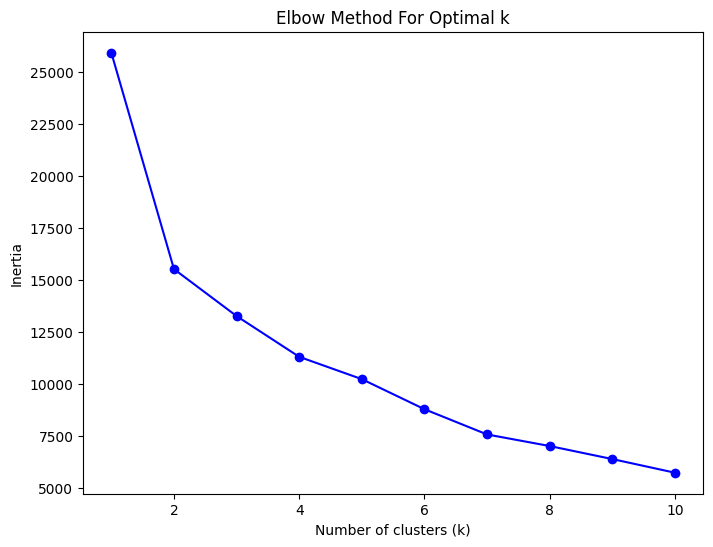

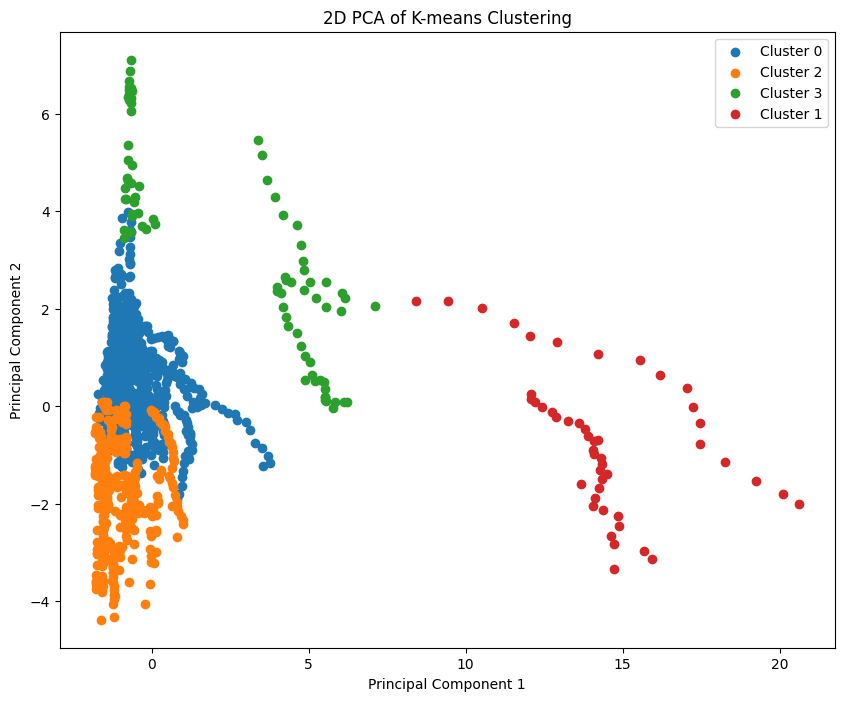

Cluster Summary:
         country         Year  Region  \
Cluster                                 
0            NaN  2004.189873     NaN   
1            NaN  2007.479167     NaN   
2            NaN  2007.692098     NaN   
3            NaN  1999.962500     NaN   

         CO2 emissions from fuel combustion (MtCO2)  \
Cluster                                               
0                                        323.762373   
1                                       6254.211047   
2                                        187.182517   
3                                       1255.801592   

         Average CO2 emission factor (tCO2/toe)  \
Cluster                                           
0                                      2.452998   
1                                      2.657052   
2                                      1.615514   
3                                      2.516053   

         CO2 intensity at constant purchasing power parities (kCO2/$15p)  \
Cluster               

<Figure size 1500x1000 with 0 Axes>

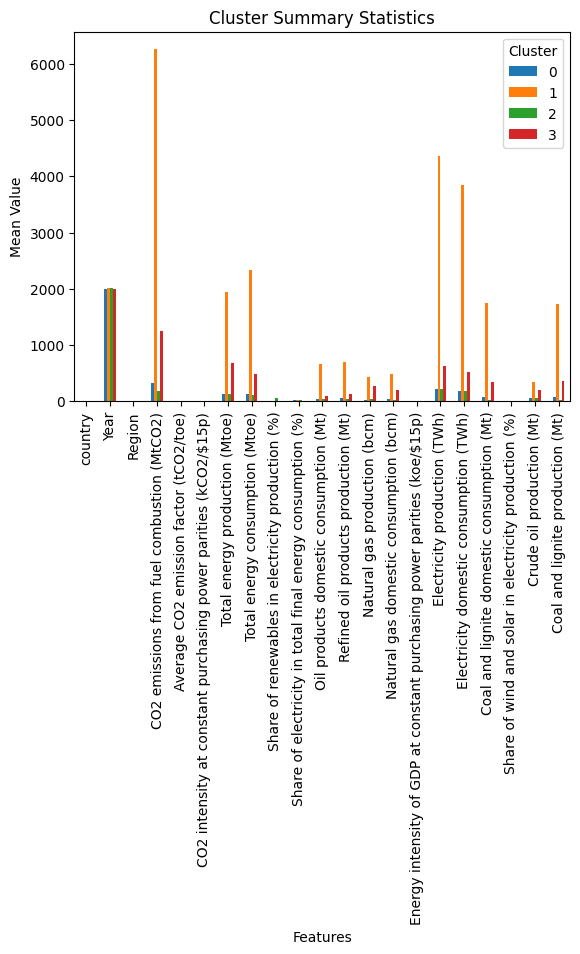

ModuleNotFoundError: No module named 'ace_tools'

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# One-Hot Encoding for categorical variables
categorical_cols = ['country', 'Region']
onehot_encoder = OneHotEncoder(drop='first')
encoded_categorical_data = onehot_encoder.fit_transform(dataset[categorical_cols]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
dataset_processed = dataset.drop(categorical_cols, axis=1)
dataset_processed = pd.concat([dataset_processed, encoded_categorical_df], axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_processed)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset_processed.columns)

# Display the loading DataFrame
print("Principal Component Loadings:")
print(loading_df)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

# Display the cluster summary
import ace_tools as tools; tools.display_dataframe_to_user(name="Cluster Summary", dataframe=cluster_summary)

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-means 
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Get score
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.27009368534237216


Principal Component Loadings:
                                                    Principal Component 1  \
Year                                                             0.029389   
CO2 emissions from fuel combustion (MtCO2)                       0.316765   
Average CO2 emission factor (tCO2/toe)                           0.063319   
CO2 intensity at constant purchasing power pari...               0.059384   
Total energy production (Mtoe)                                   0.313307   
Total energy consumption (Mtoe)                                  0.321198   
Share of renewables in electricity production (%)               -0.047058   
Share of electricity in total final energy cons...               0.000058   
Oil products domestic consumption (Mt)                           0.301962   
Refined oil products production (Mt)                             0.305983   
Natural gas production (bcm)                                     0.229917   
Natural gas domestic consumption (bcm)        

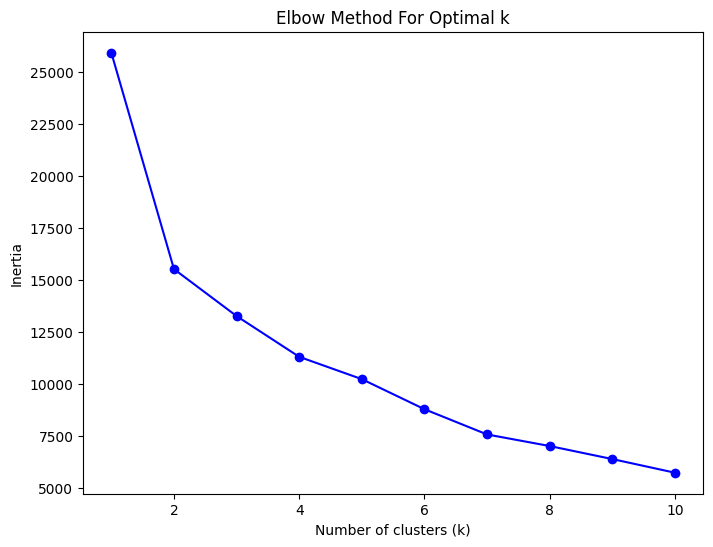

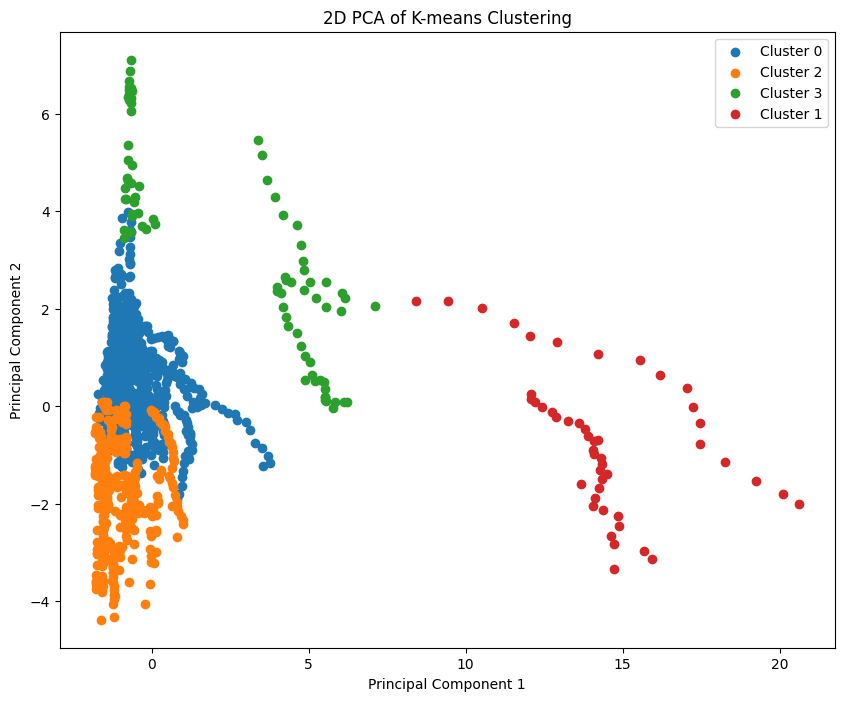

Cluster Summary:
         country         Year  Region  \
Cluster                                 
0            NaN  2004.189873     NaN   
1            NaN  2007.479167     NaN   
2            NaN  2007.692098     NaN   
3            NaN  1999.962500     NaN   

         CO2 emissions from fuel combustion (MtCO2)  \
Cluster                                               
0                                        323.762373   
1                                       6254.211047   
2                                        187.182517   
3                                       1255.801592   

         Average CO2 emission factor (tCO2/toe)  \
Cluster                                           
0                                      2.452998   
1                                      2.657052   
2                                      1.615514   
3                                      2.516053   

         CO2 intensity at constant purchasing power parities (kCO2/$15p)  \
Cluster               

<Figure size 1500x1000 with 0 Axes>

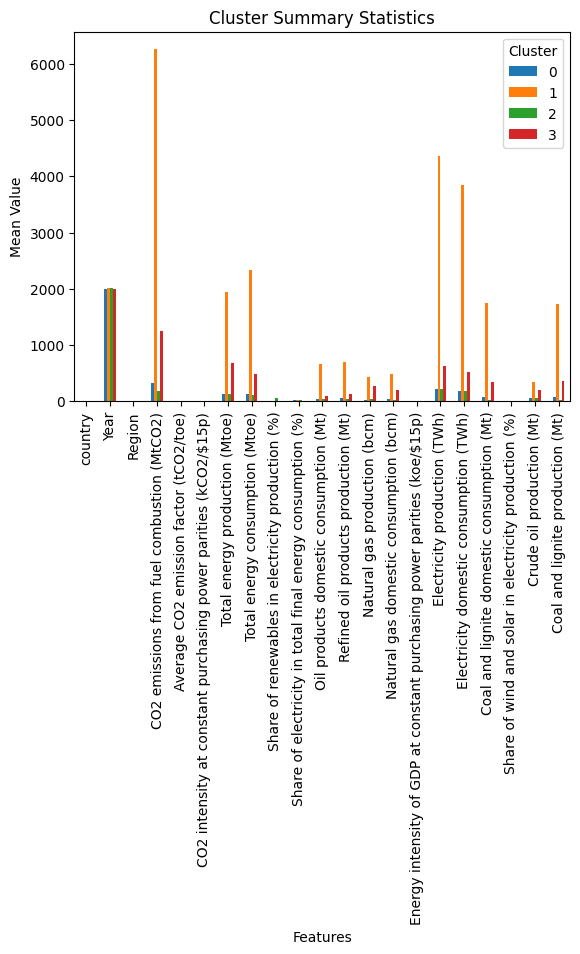

Cluster 0:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# One-Hot Encoding for categorical variables
categorical_cols = ['country', 'Region']
onehot_encoder = OneHotEncoder(drop='first')
encoded_categorical_data = onehot_encoder.fit_transform(dataset[categorical_cols]).toarray()
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
dataset_processed = dataset.drop(categorical_cols, axis=1)
dataset_processed = pd.concat([dataset_processed, encoded_categorical_df], axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_processed)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset_processed.columns)

# Display the loading DataFrame
print("Principal Component Loadings:")
print(loading_df)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

# Show countries in each cluster
clusters = dataset.groupby('Cluster')['country'].apply(list)

# Display the countries in each cluster
for cluster_id, countries in clusters.items():
    print(f"Cluster {cluster_id}:")
    print(countries)
    print()

Principal Component Loadings:
                                                    Principal Component 1  \
Year                                                             0.029389   
CO2 emissions from fuel combustion (MtCO2)                       0.316765   
Average CO2 emission factor (tCO2/toe)                           0.063319   
CO2 intensity at constant purchasing power pari...               0.059384   
Total energy production (Mtoe)                                   0.313307   
Total energy consumption (Mtoe)                                  0.321198   
Share of renewables in electricity production (%)               -0.047058   
Share of electricity in total final energy cons...               0.000058   
Oil products domestic consumption (Mt)                           0.301962   
Refined oil products production (Mt)                             0.305983   
Natural gas production (bcm)                                     0.229917   
Natural gas domestic consumption (bcm)        

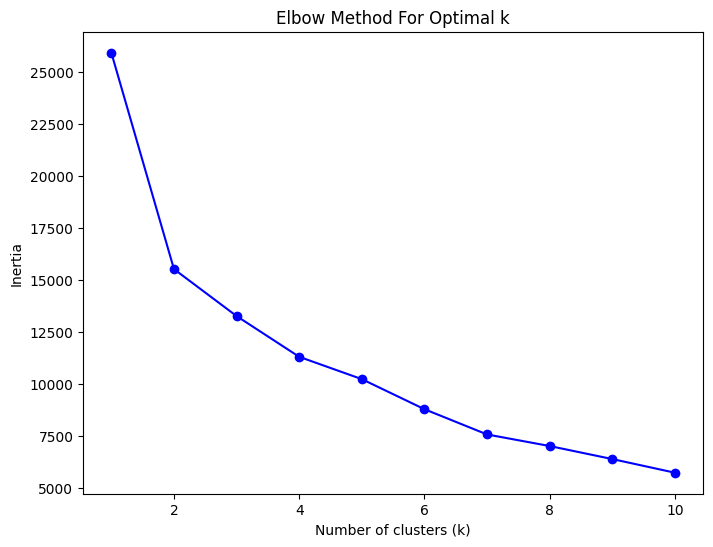

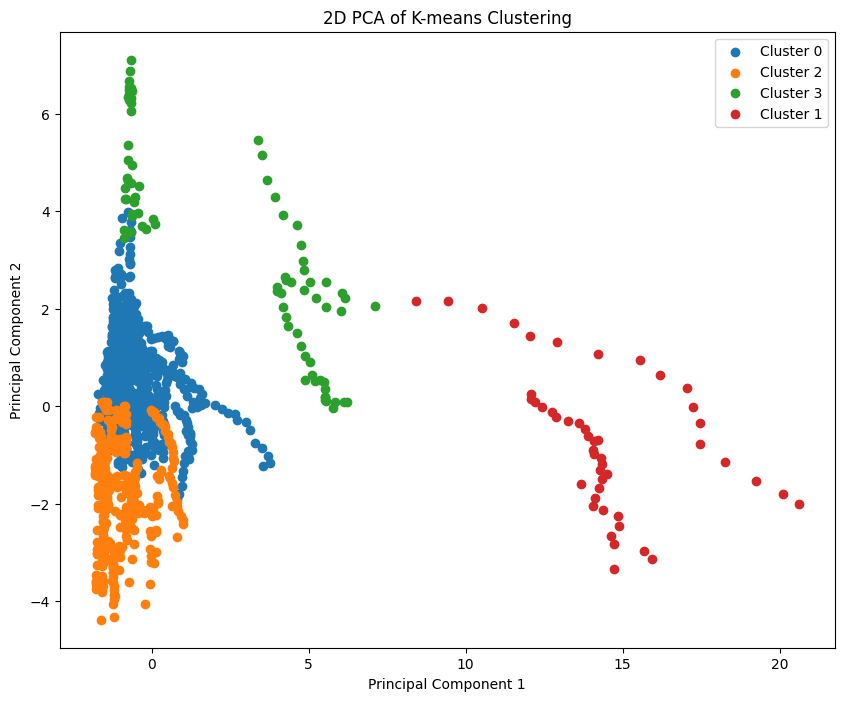

Cluster Summary:
         country         Year  CO2 emissions from fuel combustion (MtCO2)  \
Cluster                                                                     
0            NaN  2004.189873                                  323.762373   
1            NaN  2007.479167                                 6254.211047   
2            NaN  2007.692098                                  187.182517   
3            NaN  1999.962500                                 1255.801592   

         Average CO2 emission factor (tCO2/toe)  \
Cluster                                           
0                                      2.452998   
1                                      2.657052   
2                                      1.615514   
3                                      2.516053   

         CO2 intensity at constant purchasing power parities (kCO2/$15p)  \
Cluster                                                                    
0                                                 0.343105   

<Figure size 1500x1000 with 0 Axes>

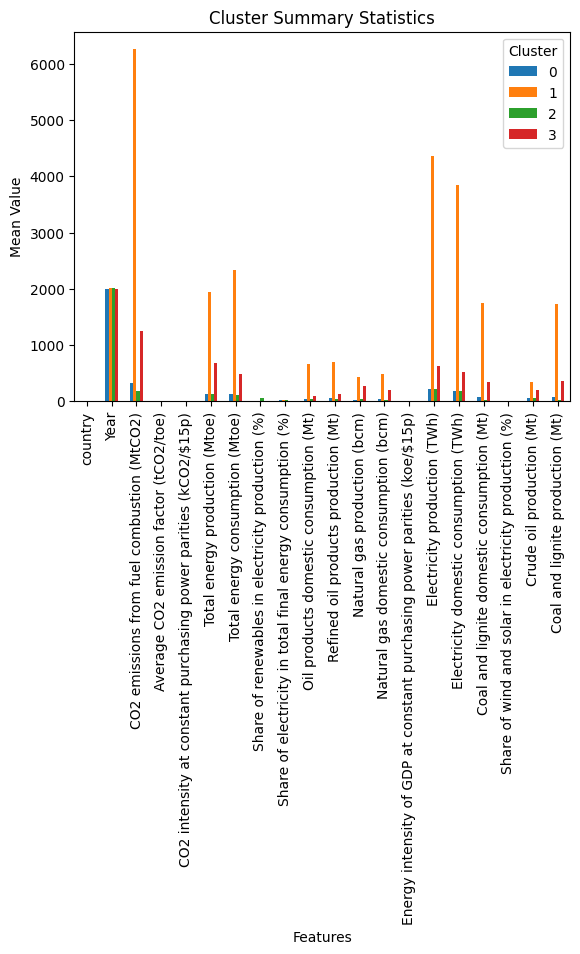

Cluster 0:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# Preserve the country column
countries = dataset['country']

# Drop the categorical columns (excluding 'country') and keep the 'country' column for later use
categorical_cols = ['Region']
dataset = dataset.drop(categorical_cols, axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('country', axis=1))

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset.columns.drop('country'))

# Display the loading DataFrame
print("Principal Component Loadings:")
print(loading_df)

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters
dataset['country'] = countries

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters
pca_df['country'] = countries

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

# Show countries in each cluster
clusters = dataset.groupby('Cluster')['country'].apply(list)

# Display the countries in each cluster
for cluster_id, countries in clusters.items():
    print(f"Cluster {cluster_id}:")
    print(countries)
    print()

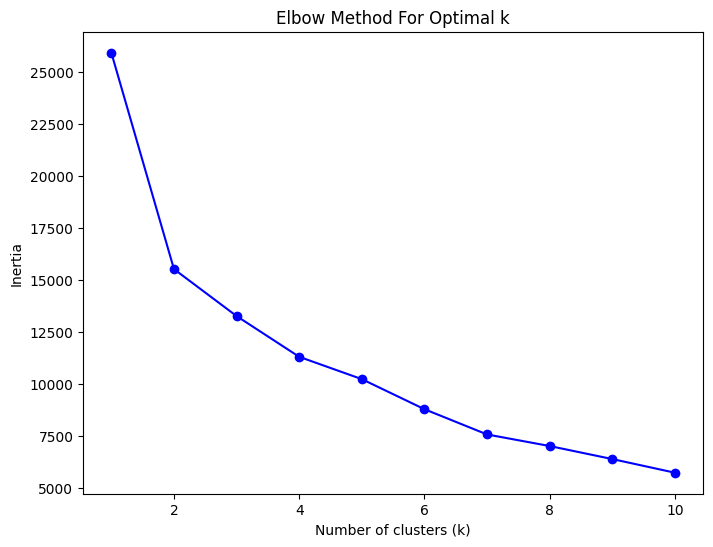

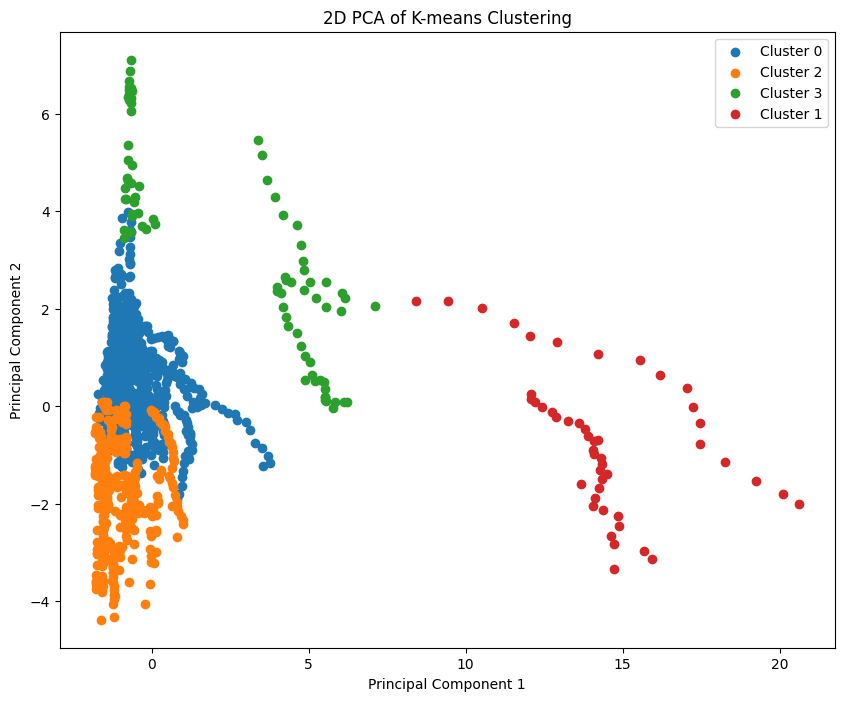

Cluster Summary:
         country         Year  CO2 emissions from fuel combustion (MtCO2)  \
Cluster                                                                     
0            NaN  2004.189873                                  323.762373   
1            NaN  2007.479167                                 6254.211047   
2            NaN  2007.692098                                  187.182517   
3            NaN  1999.962500                                 1255.801592   

         Average CO2 emission factor (tCO2/toe)  \
Cluster                                           
0                                      2.452998   
1                                      2.657052   
2                                      1.615514   
3                                      2.516053   

         CO2 intensity at constant purchasing power parities (kCO2/$15p)  \
Cluster                                                                    
0                                                 0.343105   

<Figure size 1500x1000 with 0 Axes>

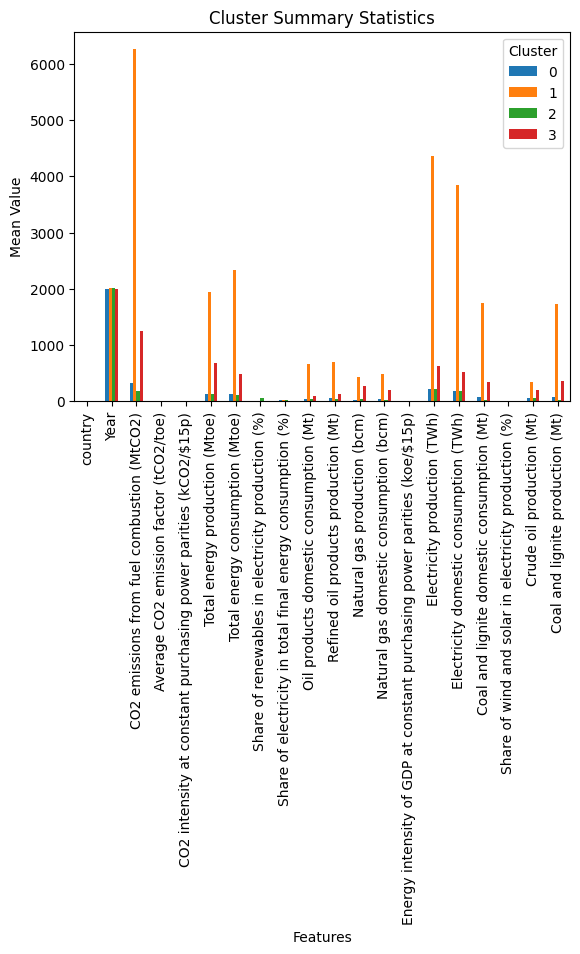

Cluster 0:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# Preserve the country column
countries = dataset['country']

# Drop the categorical columns (excluding 'country') and keep the 'country' column for later use
categorical_cols = ['Region']
dataset = dataset.drop(categorical_cols, axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('country', axis=1))

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset.columns.drop('country'))

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters
dataset['country'] = countries

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters
pca_df['country'] = countries

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

# Show countries in each cluster
clusters_countries = dataset.groupby('Cluster')['country'].apply(list)

# Display the countries in each cluster
for cluster_id, countries in clusters_countries.items():
    print(f"Cluster {cluster_id}:")
    print(countries)
    print()


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_cols] = dataset[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# Preserve the country column
countries = dataset['country']

# Drop the categorical columns (excluding 'country') and keep the 'country' column for later use
categorical_cols = ['Region']
dataset = dataset.drop(categorical_cols, axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('country', axis=1))

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset.columns.drop('country'))

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters
dataset['country'] = countries

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters
pca_df['country'] = countries

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

# Show countries in each cluster
clusters_countries = dataset.groupby('Cluster')['country'].apply(list)

# Display the countries in each cluster
for cluster_id, countries in clusters_countries.items():
    print(f"Cluster {cluster_id}:")
    print(countries)
    print()


C:\Users\park\AppData\Local\Temp\ipykernel_24824\4106512207.py:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(), inplace=True)


TypeError: float() argument must be a string or a real number, not 'NAType'

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_cols] = dataset[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns (only for numeric columns)
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Preserve the country column
countries = dataset['country']

# Drop the categorical columns (excluding 'country') and keep the 'country' column for later use
categorical_cols = ['Region']
dataset = dataset.drop(categorical_cols, axis=1)

# Standardizing the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('country', axis=1))

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset.columns.drop('country'))

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters
dataset['country'] = countries

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters
pca_df['country'] = countries

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

# Show countries in each cluster
clusters_countries = dataset.groupby('Cluster')['country'].apply(list)

# Display the countries in each cluster
for cluster_id, countries in clusters_countries.items():
    print(f"Cluster {cluster_id}:")
    print(countries)
    print()


TypeError: float() argument must be a string or a real number, not 'NAType'

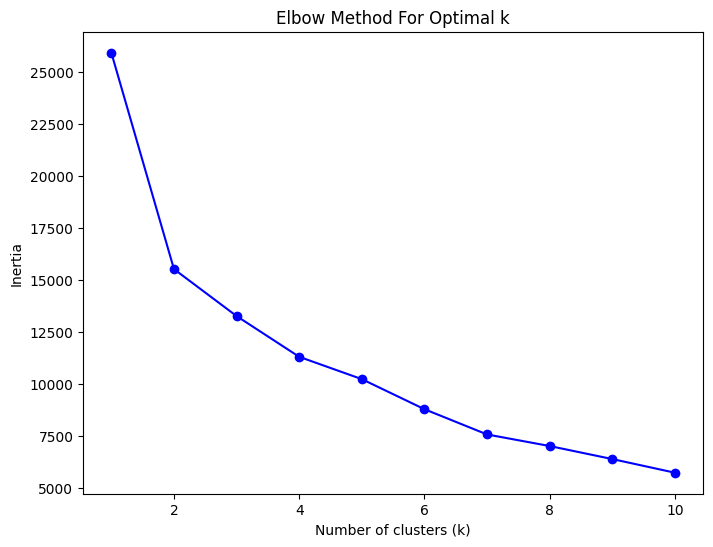

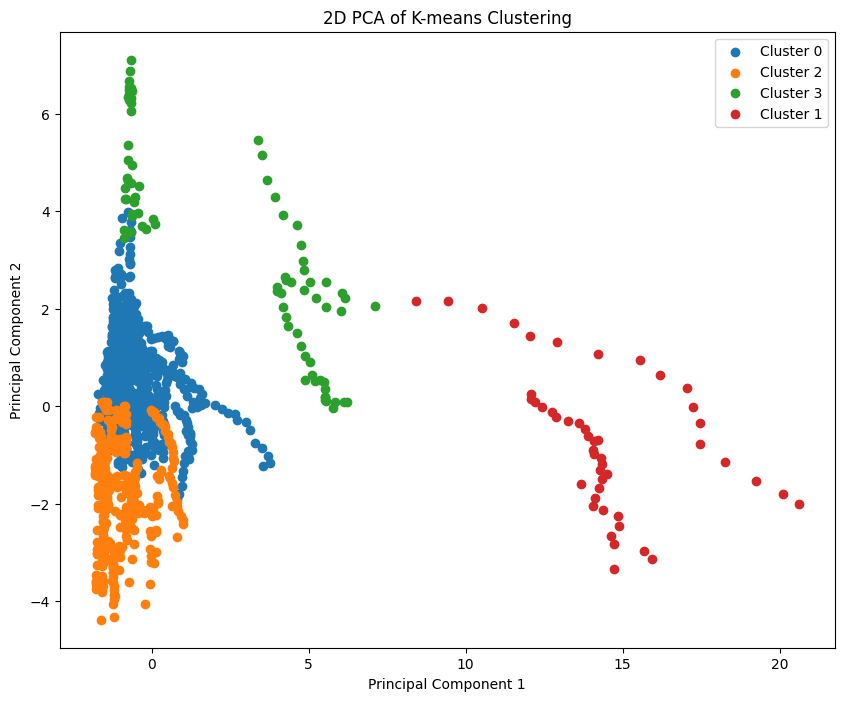

Cluster Summary:
         country         Year  CO2 emissions from fuel combustion (MtCO2)  \
Cluster                                                                     
0            NaN  2004.189873                                  323.762373   
1            NaN  2007.479167                                 6254.211047   
2            NaN  2007.692098                                  187.182517   
3            NaN  1999.962500                                 1255.801592   

         Average CO2 emission factor (tCO2/toe)  \
Cluster                                           
0                                      2.452998   
1                                      2.657052   
2                                      1.615514   
3                                      2.516053   

         CO2 intensity at constant purchasing power parities (kCO2/$15p)  \
Cluster                                                                    
0                                                 0.343105   

<Figure size 1500x1000 with 0 Axes>

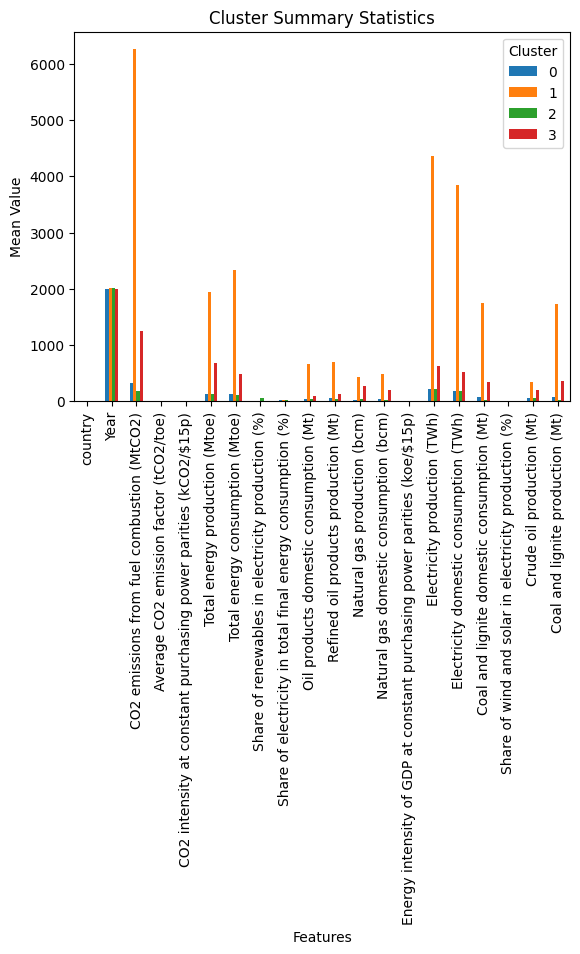

Cluster 0:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = 'original_dataset.csv'
dataset = pd.read_csv(file_path)

# Replace 'n.a.' with NaN
dataset.replace('n.a.', pd.NA, inplace=True)

# Ensure all non-numeric values are properly handled
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

# Preserve the country column
countries = dataset['country']

# Drop the categorical columns (excluding 'country') and keep the 'country' column for later use
categorical_cols = ['Region']
dataset = dataset.drop(categorical_cols, axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('country', axis=1))

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Get the component loadings
loadings = pca.components_.T

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=['Principal Component 1', 'Principal Component 2'], index=dataset.columns.drop('country'))

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the optimal number of clusters (4 in this case)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
dataset['Cluster'] = clusters
dataset['country'] = countries

# Use PCA to reduce dimensions to 2 for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters
pca_df['country'] = countries

plt.figure(figsize=(10, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = dataset.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the characteristics of each cluster
plt.figure(figsize=(15, 10))
cluster_summary.T.plot(kind='bar')
plt.title('Cluster Summary Statistics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.show()

# Show countries in each cluster
clusters_countries = dataset.groupby('Cluster')['country'].apply(list)

# Display the countries in each cluster
for cluster_id, countries in clusters_countries.items():
    print(f"Cluster {cluster_id}:")
    print(countries)
    print()
